# New Catalog

In [1]:
%load_ext kedro.ipython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [2]:
demografia = catalog.load("demografia_clean")
insulina = catalog.load("insulina_clean")
perfilB = catalog.load("perfilBioquimico_clean")
presion = catalog.load("presion_clean")
medidas = catalog.load("medidasCorporales_clean")

[10/14/24 21:05:39] INFO     Loading data from demografia_clean (ParquetDataset)...             ]8;id=85253;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=708583;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from insulina_clean (ParquetDataset)...               ]8;id=523993;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=888128;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from perfilBioquimico_clean (ParquetDataset)...       ]8;id=707642;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=210387;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from presion_clean (ParquetDataset)...                ]8;id=439706;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=656453;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from medidasCorporales_clean (ParquetDataset)...      ]8;id=917532;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=776455;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

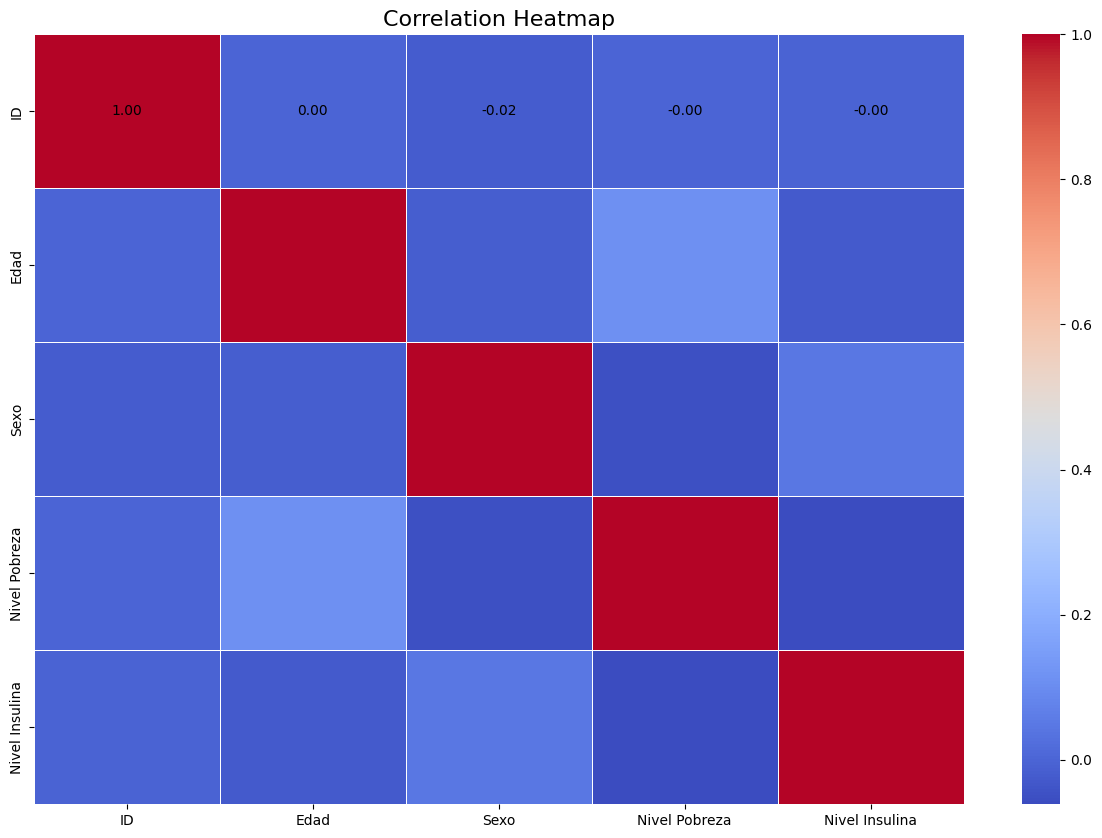

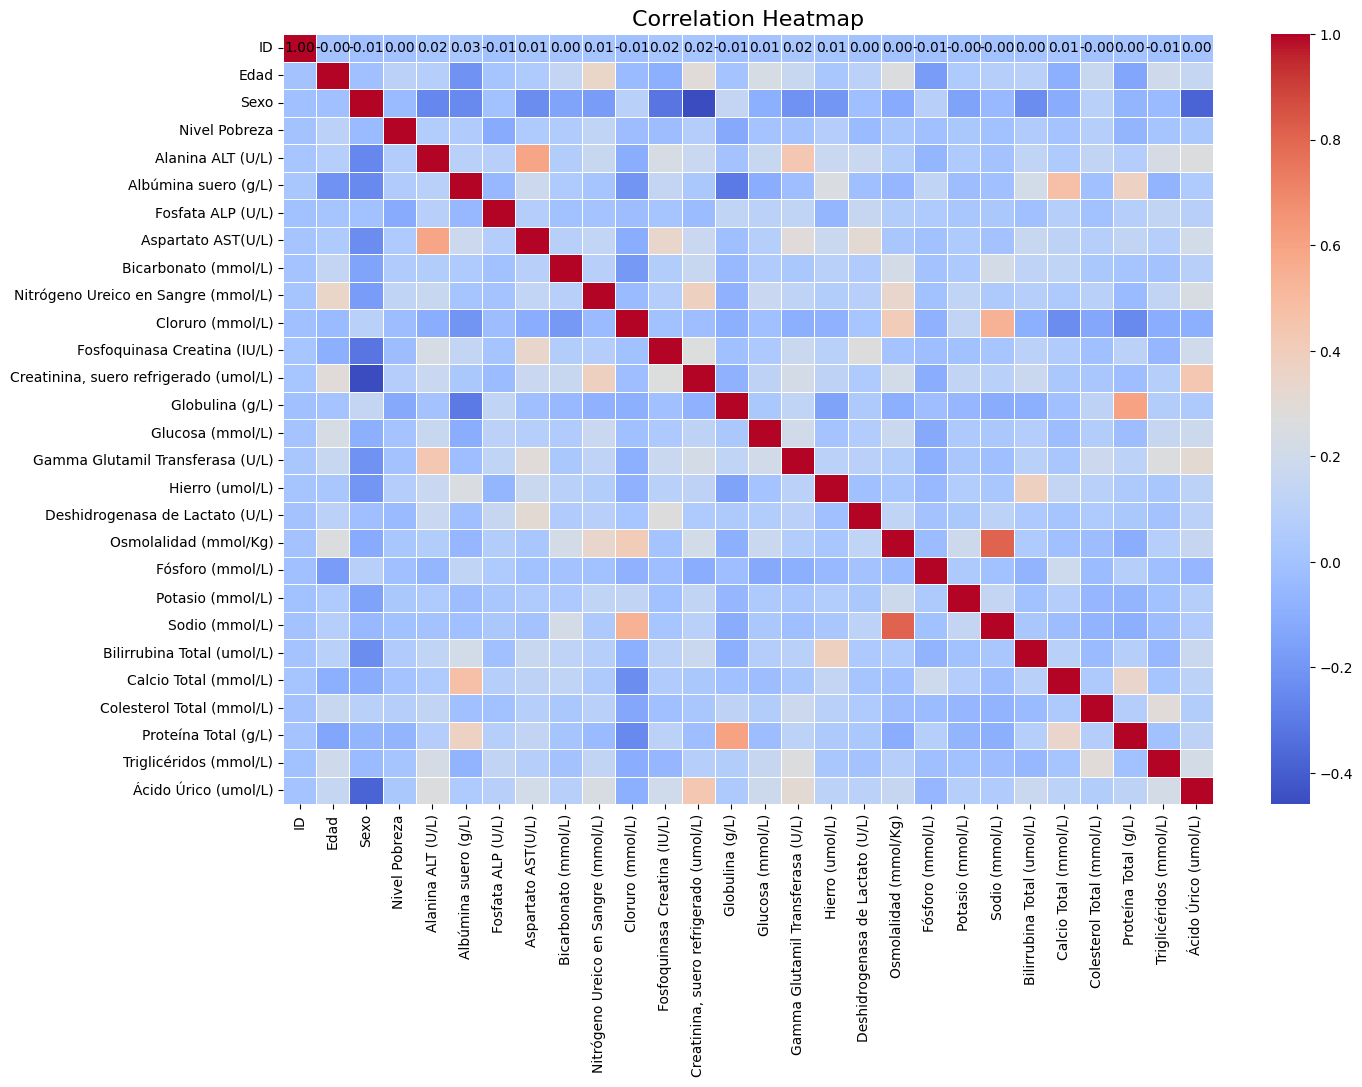

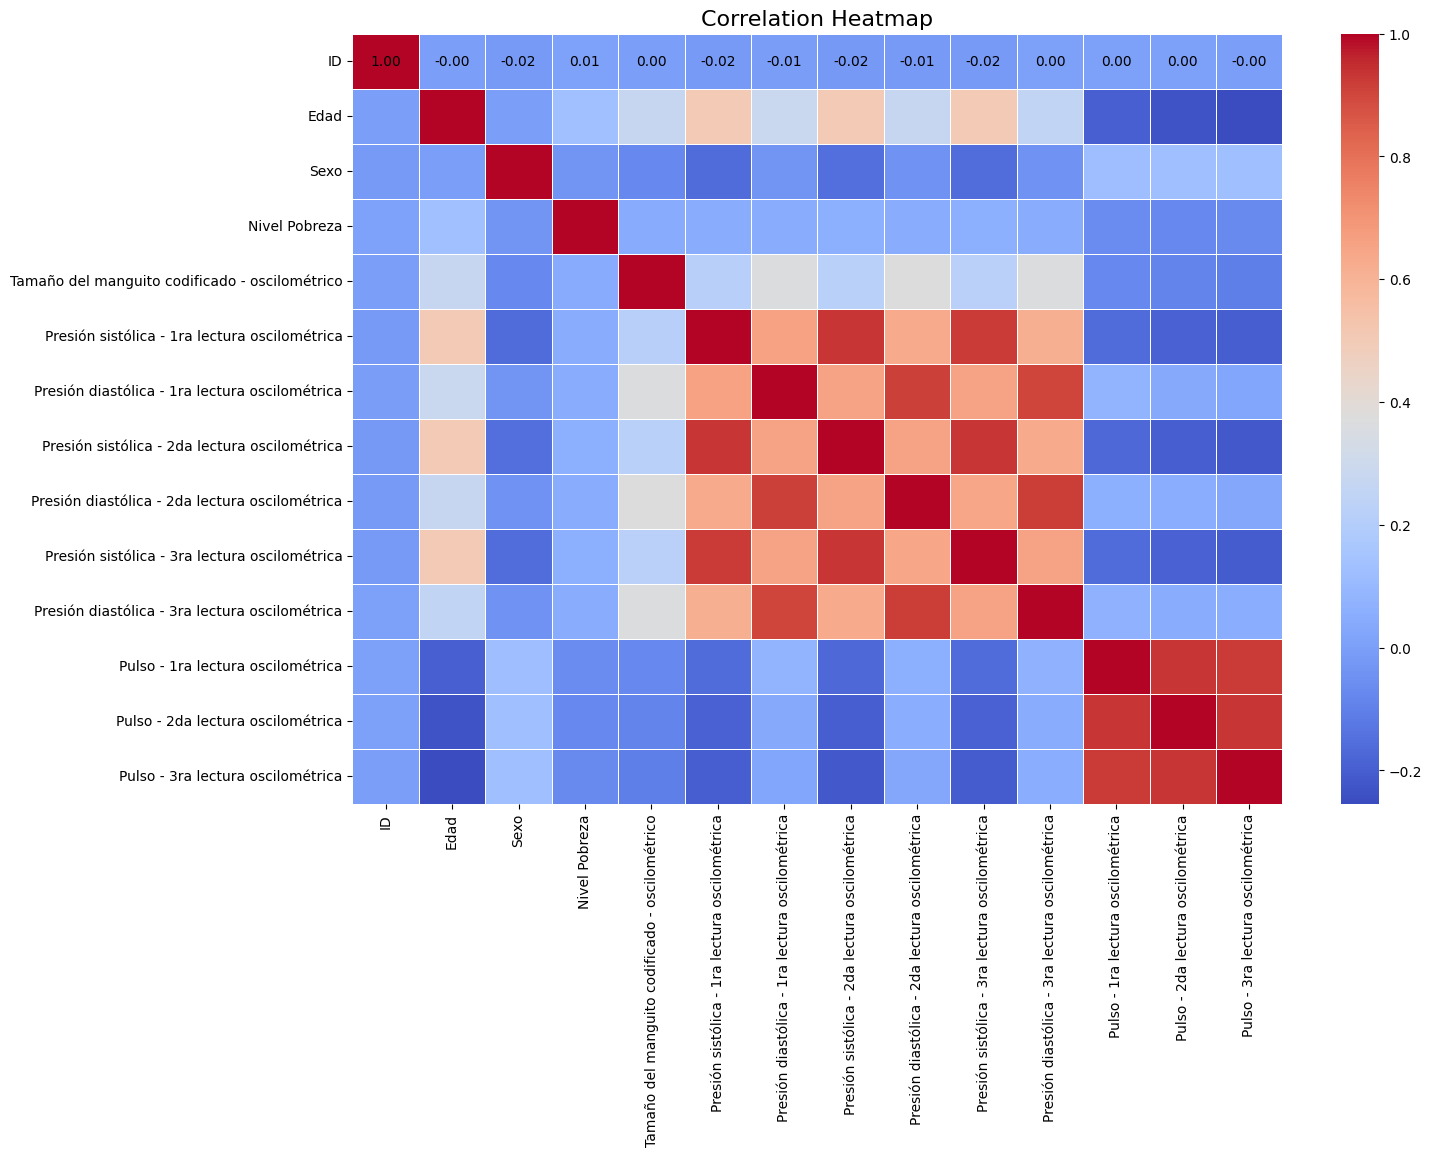

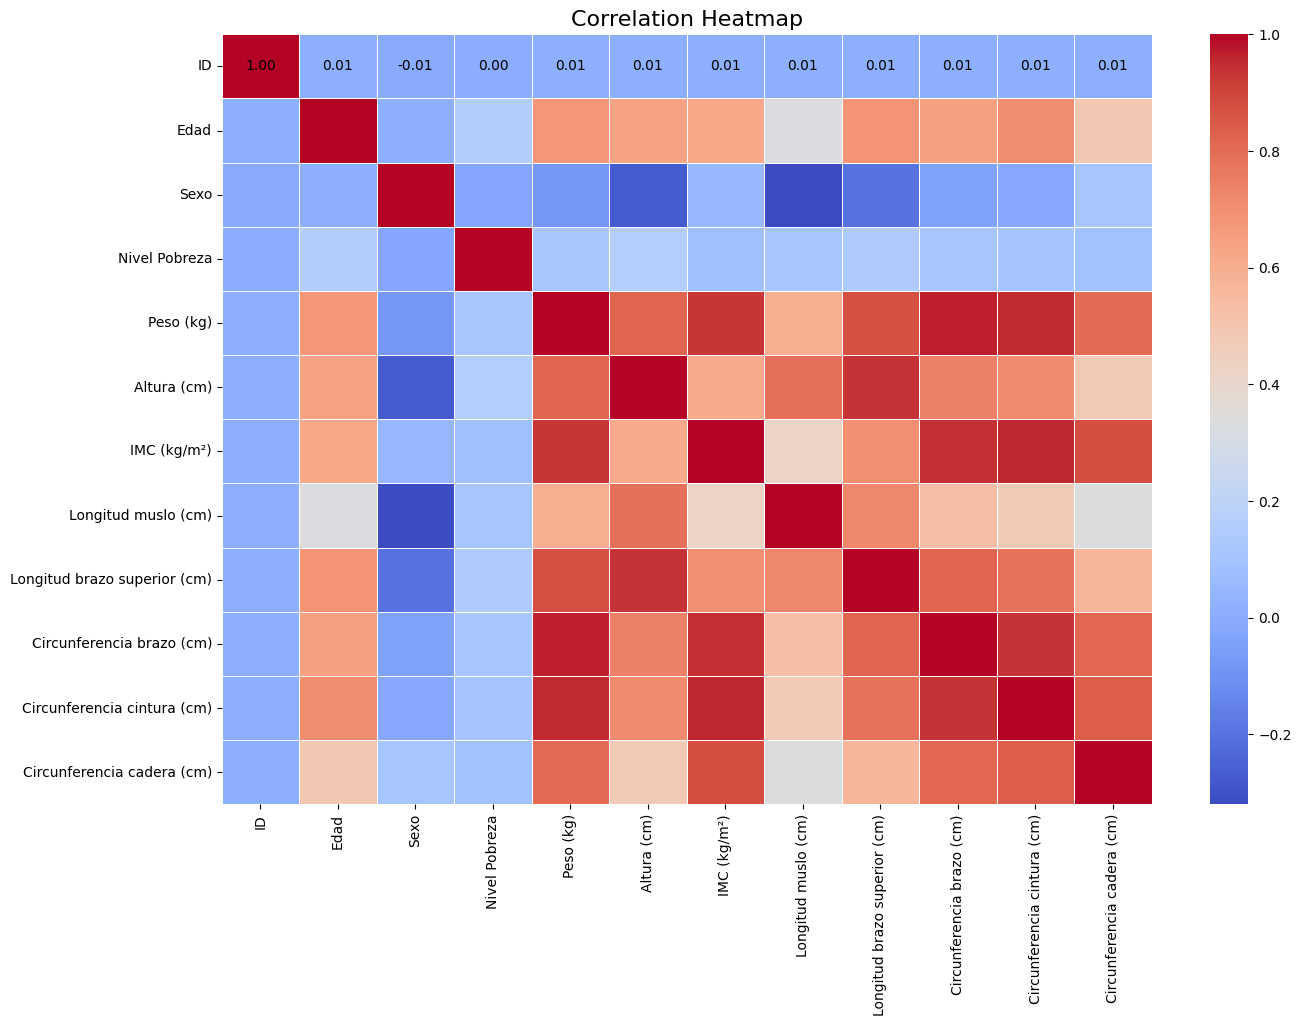

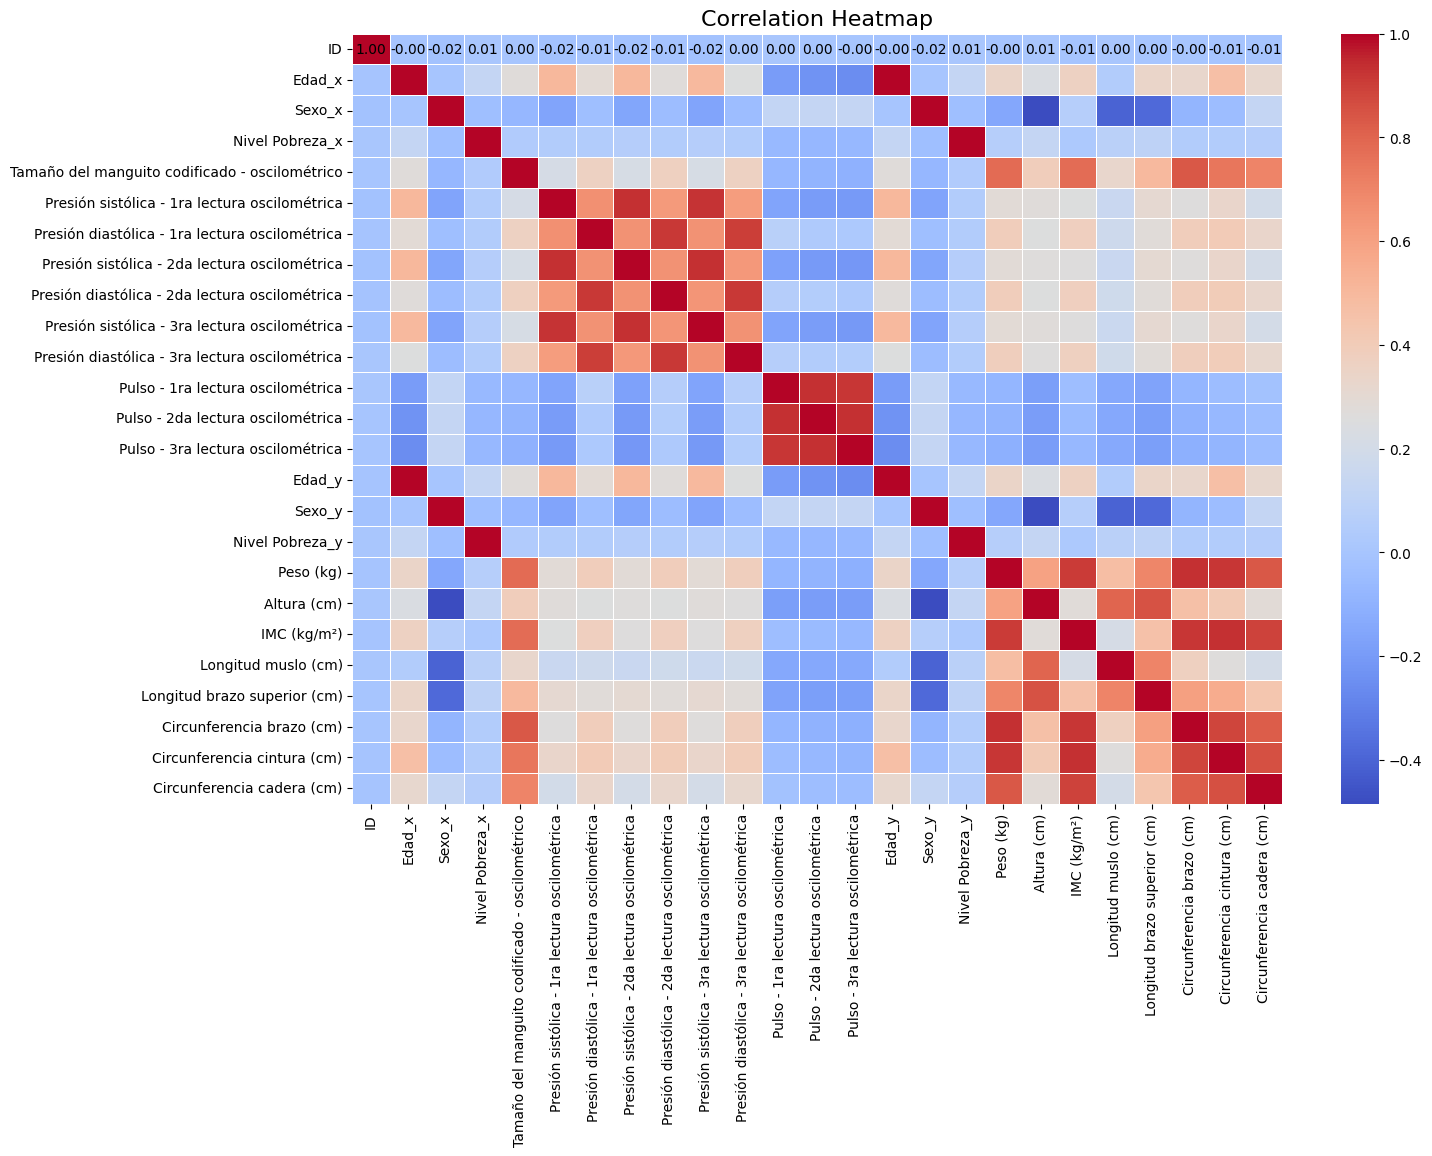

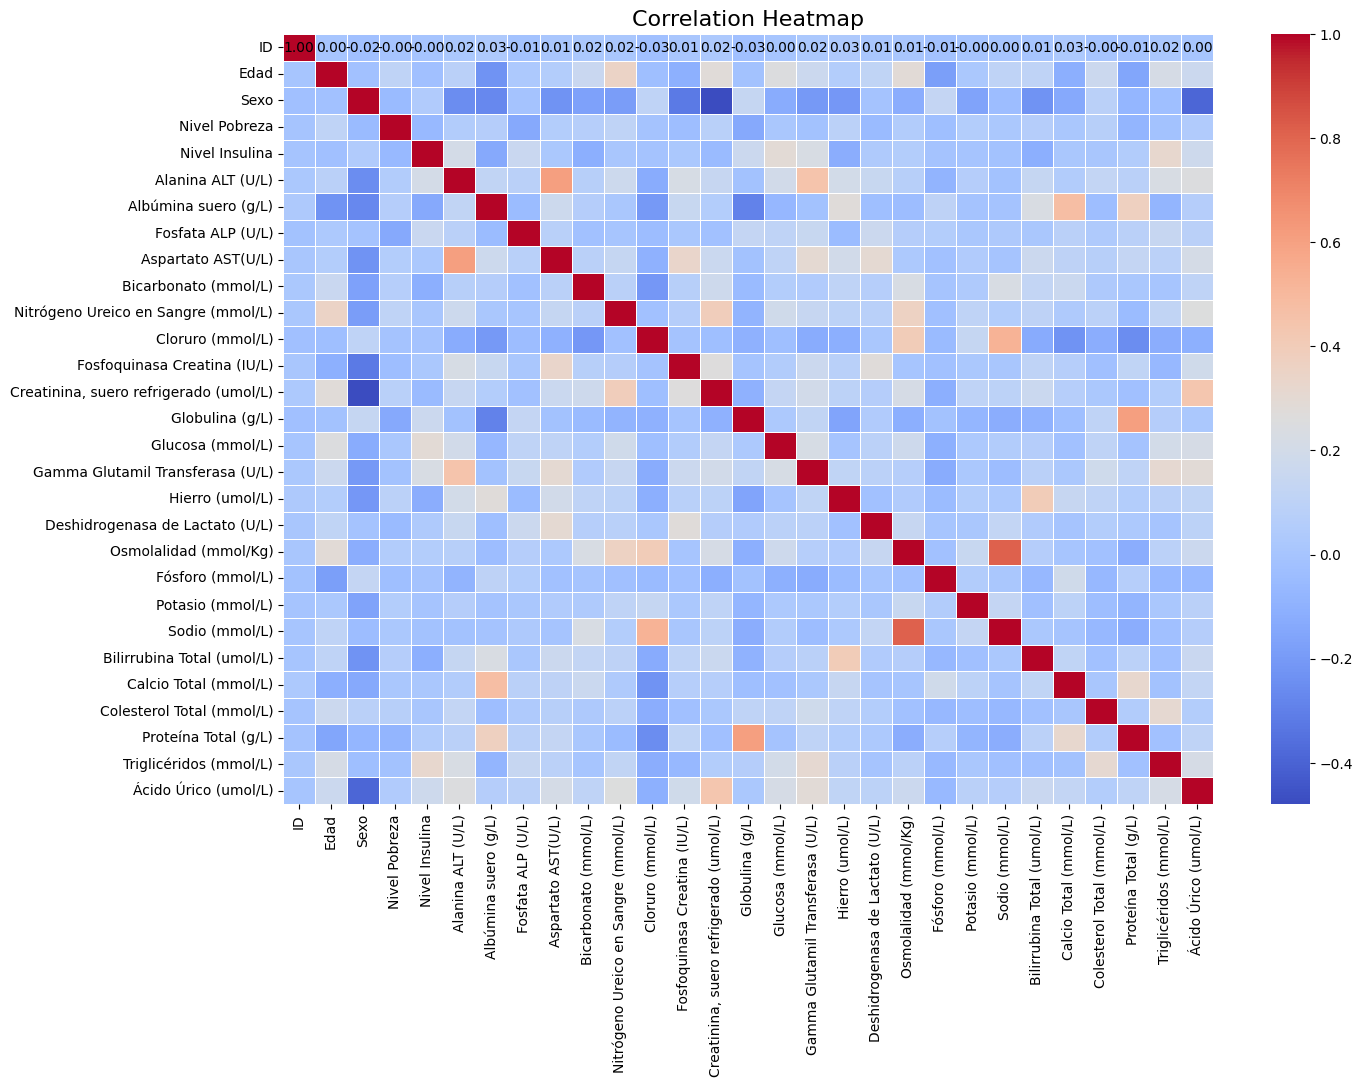

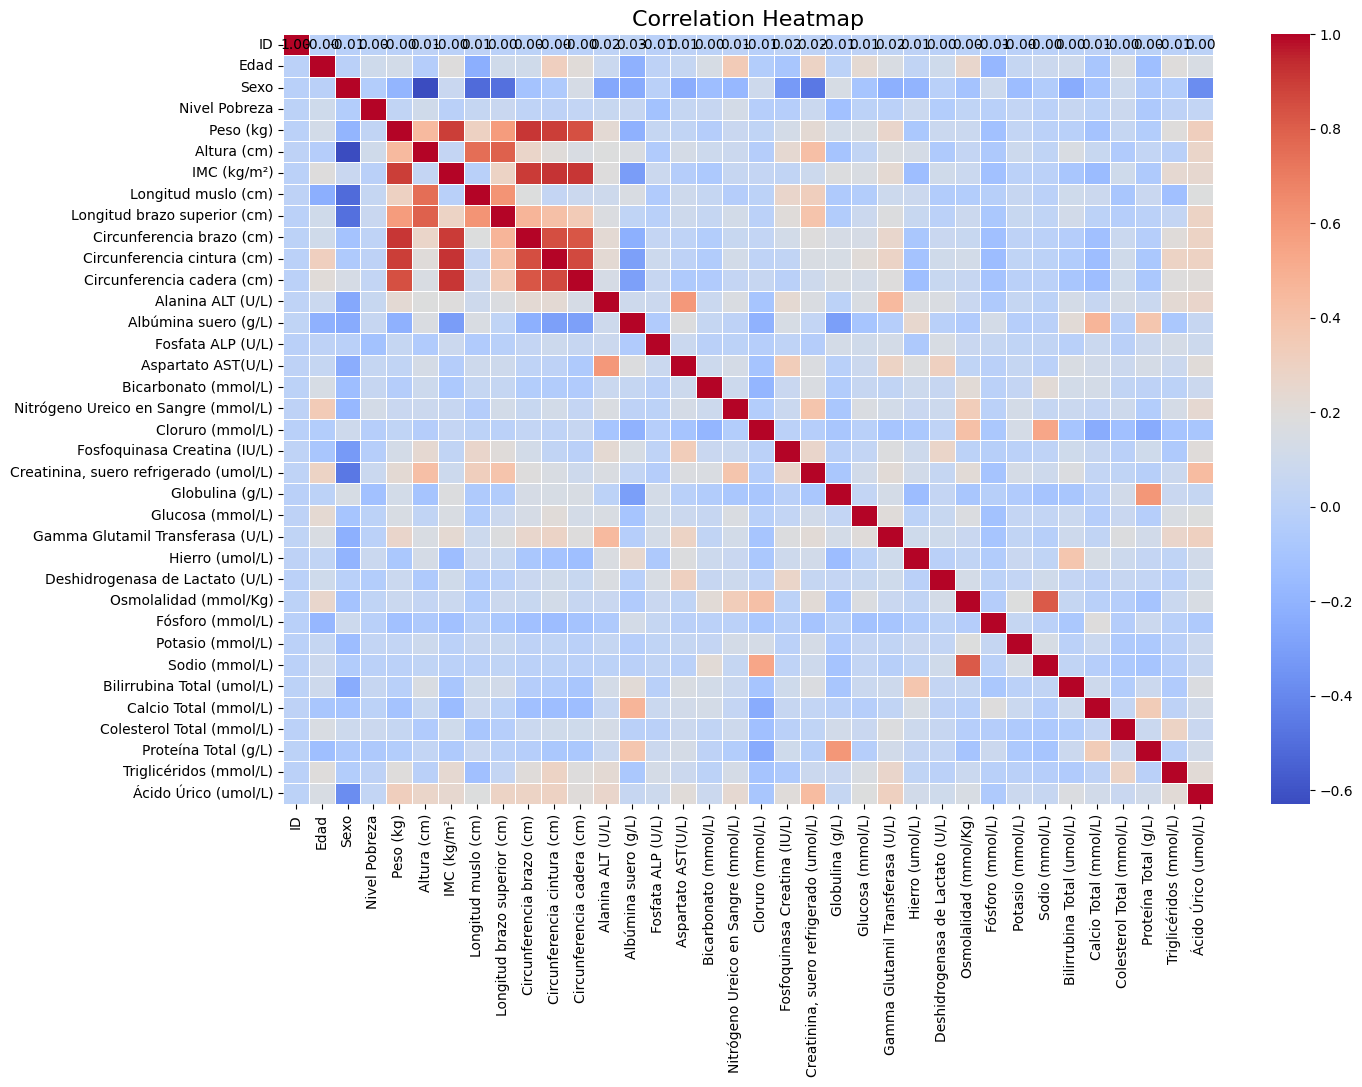

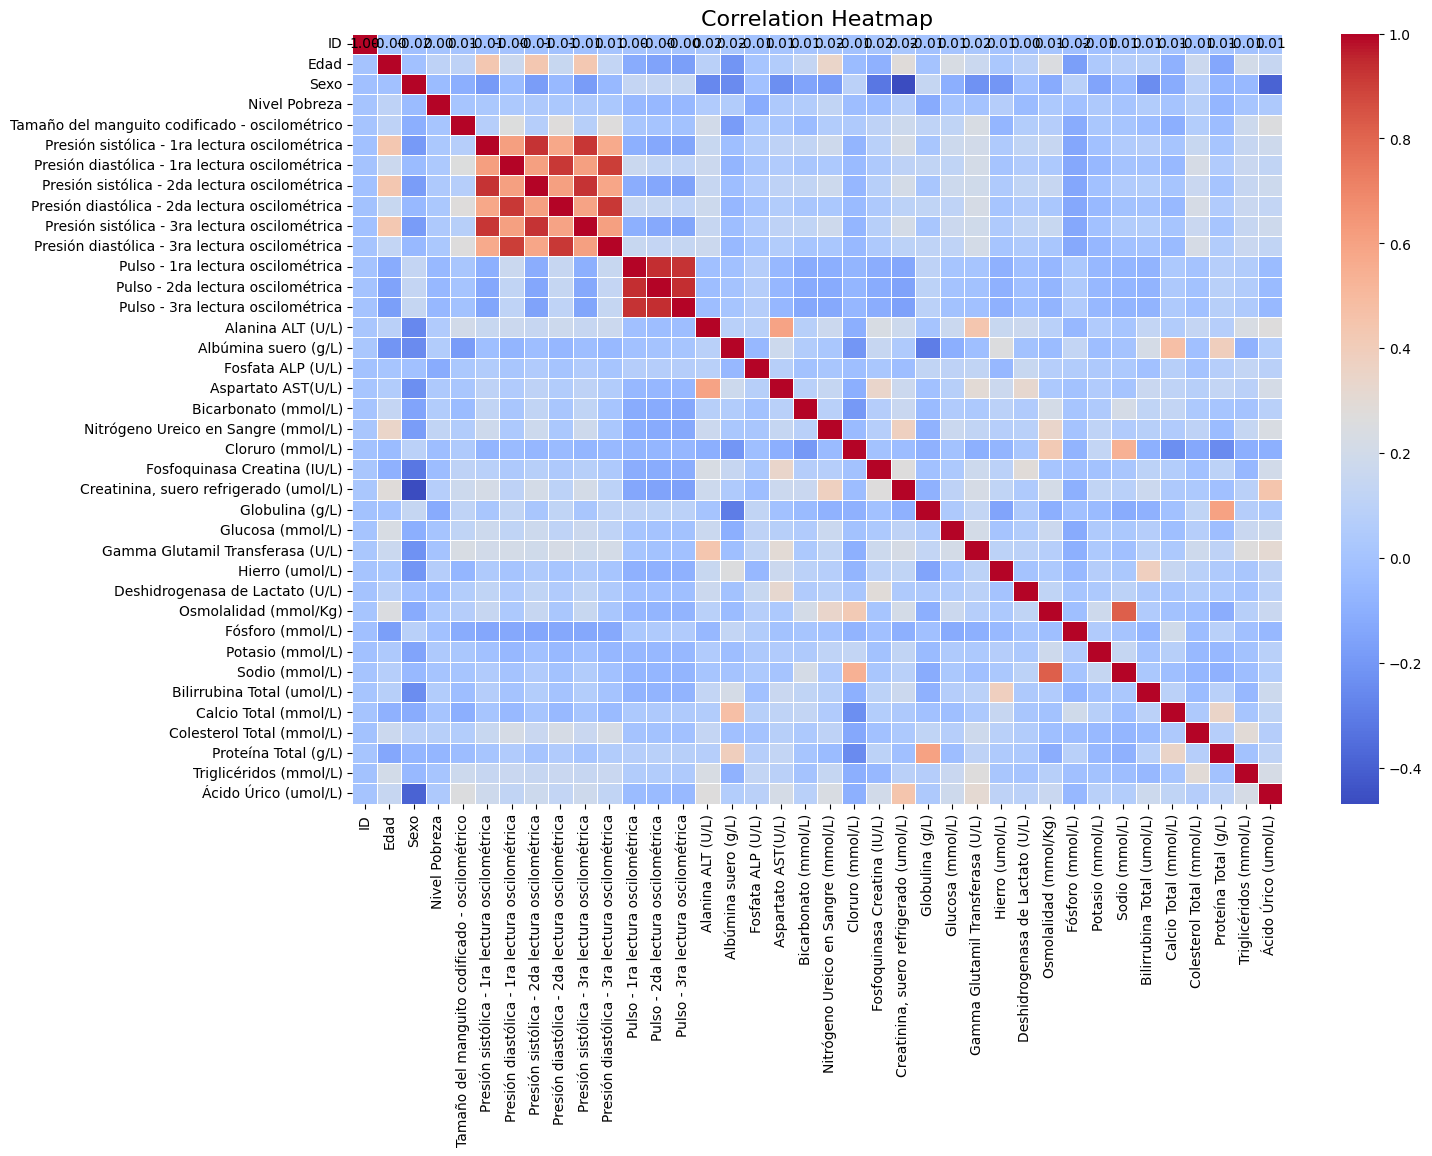

In [3]:
dataframes = {
    'insulina' : insulina,
    'perfilB': perfilB,
    'presion' : presion,
    'medidas' : medidas,
    'presion_medidas' : pd.merge(presion, medidas, how='inner', on='ID'),
    'insu_perfil' : pd.merge(insulina, perfilB, how='inner', on=['ID', 'Edad', 'Sexo', 'Nivel Pobreza']),
    'medidas_perfil' : pd.merge(medidas, perfilB, how='inner', on=['ID', 'Edad', 'Sexo', 'Nivel Pobreza']),
    'presion_perfil' : pd.merge(presion, perfilB, how='inner', on=['ID', 'Edad', 'Sexo', 'Nivel Pobreza'])
}

for data in dataframes:
    corr_matrix = dataframes[data].corr()

    # Create the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"color": "black"})
    
    # Set titles and labels
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()